<a href="https://colab.research.google.com/github/OktaviaOZ/python-machine-learning-book/blob/master/Zavada_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Toward our workshop, I create a first Deep Learning Model.
####I choose a classificanion problem from my current work area "Glass and Mirror" to solve.
####I am going to build a Classification Model to classify:
*   **clear float glasses sheet**
*   **float mirror sheet**





####The composition of the training base can affect the quality of the resulting recognition system more than all other factors.
####The number of examples has to be sufficient for the neural network to recognize even noisy examples and it is necessary to have a considerable number of the quality images.
####I use google search to collect my dataset cause I have limit of time and resource, my goal now to try deep learning method. In the future, for the robust classification model, I would like taking photographs in a different ways.
####In my case, I have to know what will be requirements to build the model. Will i require to recognize the mirror into an interior or just from a good quality photograph?  What is the tolerance levels for errors? Now I could not answer these questions. In the real business case, these questions are the essence task. For example, to recognize a mirror into an interior the data preparation requires the right answers labeled, an algorithm can learn from them. 


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#Here i specify the path of the dataset location which is in 
root_dir = "/content/gdrive/My Drive/AI/DP_CV"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


##Images downloading. 

####I use https://github.com/hardikvasa/google-images-download library.
####To download more than 100 images it has to be installed chromedriver app and selenium library.

It’s a standard practice to start the notebook with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip install google_images_download

In [0]:
!pip install selenium

In [0]:
!apt-get update
!apt install chromium-chromedriver

In [0]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [0]:
#from selenium import webdriver
import google_images_download

In [0]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
## open it and go to a website and get results
wd = webdriver.Chrome('chromedriver',options=options)

In [0]:
!googleimagesdownload -k "clear float glasses sheet" --format jpg --limit 1000 -o "/content/gdrive/My Drive/AI/DP_CV" -pp --chromedriver '/usr/lib/chromium-browser/chromedriver'

In [0]:
!googleimagesdownload -k "float mirror sheet" --format jpg --limit 1000 -o "/content/gdrive/My Drive/AI/DP_CV" -pp --chromedriver '/usr/lib/chromium-browser/chromedriver'

In [0]:
from fastai import *
from fastai.vision import *

**785 of "clear float glasses sheet" and 763 of "float mirror sheet" are all was got from this search filter.
In the beginning, I clean dataset by hand deleting many trash pictures which couldn't be using alike dirty data to obtain an accurate result. After cleaning there are 424 of "clear float glasses sheet" and 274 of "float mirror sheet". I got a little disbalanced between classes I disided not cut first class to avoid lossing information.**

**The dataset contains photographs that are taken from different positions and lightening. It's more appropriate to get much "realistic" data to obtain a good model without overfitting. **

**For my first iteration, there is not using data augmentation. But I try to do this in the next iteration to check if it can improve the result.**

##Creating an Image Data Bunch
####For creating an Image Data Bunch I used method ImageDataBunch which include getting class splits from folders and I used the from_folder method to extract the image data bunch.

In [0]:
import os
os.chdir("/content/gdrive/My Drive/AI/DP_CV")
path = 'clear float glasses sheet/'
files_1 = os.listdir(path)
len(files_1)

424

In [0]:
path = 'float mirror sheet/'
files_2 = os.listdir(path)
len(files_2)

274

In the beginning, i don't use data augmentation technique.

In [0]:
import numpy as np
np.random.seed(0)

# normalising the dataset using the same normalisation applied to the imagenet dataset
data = ImageDataBunch.from_folder(path=root_dir, train=".", valid_pct=0.2,
        ds_tfms=None, size=224, num_workers=4).normalize(imagenet_stats)

## Visualising the data

**There are two classes of the dataset to classify.**

In [0]:
data.classes

['clear float glasses sheet', 'float mirror sheet']

In [0]:
data.valid_ds.y

CategoryList (136 items)
clear float glasses sheet,float mirror sheet,clear float glasses sheet,float mirror sheet,clear float glasses sheet
Path: /content/gdrive/My Drive/AI/DP_CV

To look at a random sample of images. As we can see below, we have some background noise images which will act as noise.

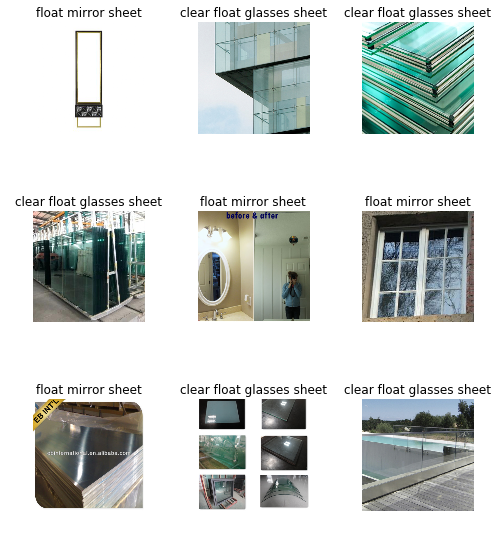

In [0]:
data.show_batch(rows=3, figsize=(7,8))

**All the size of the dataset is 698, 545 inside the train set and 136 inside the valid set.**

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['clear float glasses sheet', 'float mirror sheet'], 2, 545, 136)

## Training the Model

**Now i will start training our model. We will use a convolutional neural network backbone ResNet 34 and a fully connected head with a single hidden layer as a classifier.**

**Using ImageNet pre-trained weights and doing the transfer learning is what it is normally doing for small datasets. **

In [0]:
## To create a ResNET 34 with pretrained weights
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.fit_one_cycle(10, max_lr=0.001)

epoch,train_loss,valid_loss,accuracy,time
0,1.002638,0.691555,0.625000,00:15
1,0.902738,0.537372,0.742647,00:16
2,0.751906,0.580551,0.735294,00:15
3,0.646190,0.548841,0.750000,00:14
4,0.555778,0.521043,0.772059,00:15
5,0.476241,0.527009,0.801471,00:15
6,0.418961,0.514108,0.779412,00:15
7,0.373310,0.522331,0.772059,00:15
8,0.334750,0.526765,0.772059,00:15
9,0.298615,0.528408,0.786765,00:15


**Here I trained the model for about 3 minutes (GPU working with a Colab notebook) and for 10 epochs to reach an accuracy of just about 81%. In my first time, I used the dataset with the size 100 pictures and then I got the accuracy of the model about 57%. Definitely the size of the dataset effects on the model accuracy.**


**Saving and Loading**

I save the model.

In [0]:
learn.save('stage-1')

In [0]:
learn.export(root_dir+'/'+'weights_stage1.pkl')

## Evaluating and Interpretation of the Model

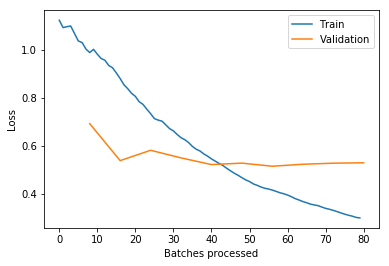

In [0]:
learn.recorder.plot_losses()

 **After 45% of the batches processed we can see our model to overfit.
 In this case, I need to tune my model. For instance, i can cut off the number of epochs and try another model RESNET with 50 layers**


In [0]:
data = ImageDataBunch.from_folder(path=root_dir, train=".", valid_pct=0.2,
        ds_tfms=None, size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [0]:
learn.fit_one_cycle(5, max_lr=0.0001)

epoch,train_loss,valid_loss,accuracy,time
0,0.113284,0.610661,0.764706,00:15
1,0.112866,0.627900,0.764706,00:15
2,0.119031,0.614564,0.779412,00:16
3,0.115314,0.620606,0.772059,00:16
4,0.107238,0.620820,0.779412,00:16


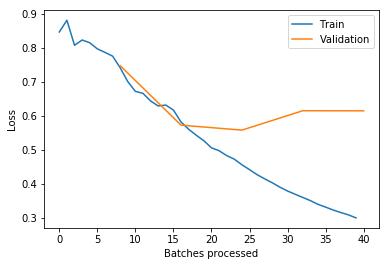

In [0]:
learn.recorder.plot_losses()

**I still have a model where the training loss becomes lower with big difference than validation loss because that means I have overfitting problem. **

###Now I try to apply Image data augmentation technique to expand the size of the training dataset.

**Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.
Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.
Image data augmentation is perhaps the most well-known type of data augmentation and involves creating transformed versions of images in the training dataset that belong to the same class as the original image.
**
 

**In the previous stage, the changing of the model doesn't improve the result. I return the model with 34 layers.**

I tried using low learning rate but it was running slower and the result did't increase.
Using low learning rate might make learning slower which mean that i have to run more epochs or a better solution is to increase the learning rate.

In [0]:
tfms = get_transforms(max_rotate=10.0, max_zoom=1.1, 
                       max_lighting=0.2, max_warp=0.2, 
                       p_affine=0.75, p_lighting=0.75)


In [0]:
data = ImageDataBunch.from_folder(path=root_dir, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.fit_one_cycle(5, max_lr=0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.909581,0.790303,0.492647,00:16
1,0.776229,0.612605,0.698529,00:17
2,0.671324,0.536291,0.772059,00:16
3,0.598745,0.523757,0.794118,00:16
4,0.534825,0.517863,0.786765,00:16


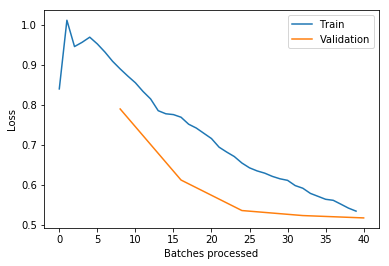

In [0]:
learn.recorder.plot_losses()

**Сharacteristics of model classes are quite similar to have these results is satisfying.**

In [0]:
learn.save('stage-11')

In [0]:
learn.export(root_dir+'/'+'weights_stage11.pkl')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(5, max_lr=0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.314354,0.906445,0.786765,00:17
1,0.347568,12.649365,0.617647,00:16
2,0.406820,16.462015,0.558824,00:16
3,0.404490,2.771552,0.720588,00:19
4,0.385020,0.813845,0.779412,00:16


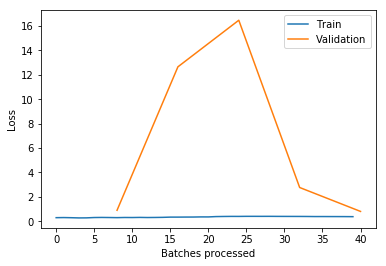

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.load('stage-11')

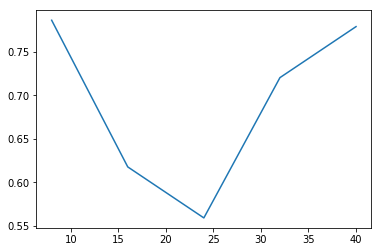

In [0]:
learn.recorder.plot_metrics()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

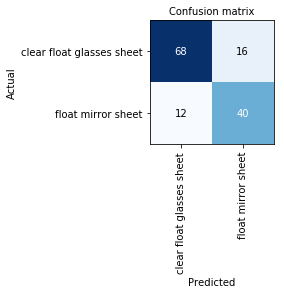

In [0]:
interp.plot_confusion_matrix(slice_size=15)

In [0]:
import matplotlib.pyplot as plt

In [0]:
from pylab import rcParams
rcParams['axes.titlesize'] = 10


I will see which were the classes that the model most confused with one another. I will try to see if what the model predicted was reasonable or not using ClassificationInterpretation class.

**In this case, the model is getting confused in detecting 'float mirror sheet' which visually looks pretty similar to 'clear float glasses sheet'. This is an indicator that our classifier is not strong. Furthermore, when we plot the confusion matrix, we can see that most of 'clear float glasses sheet' are classified correctly, but 'float mirror sheet' are not.**

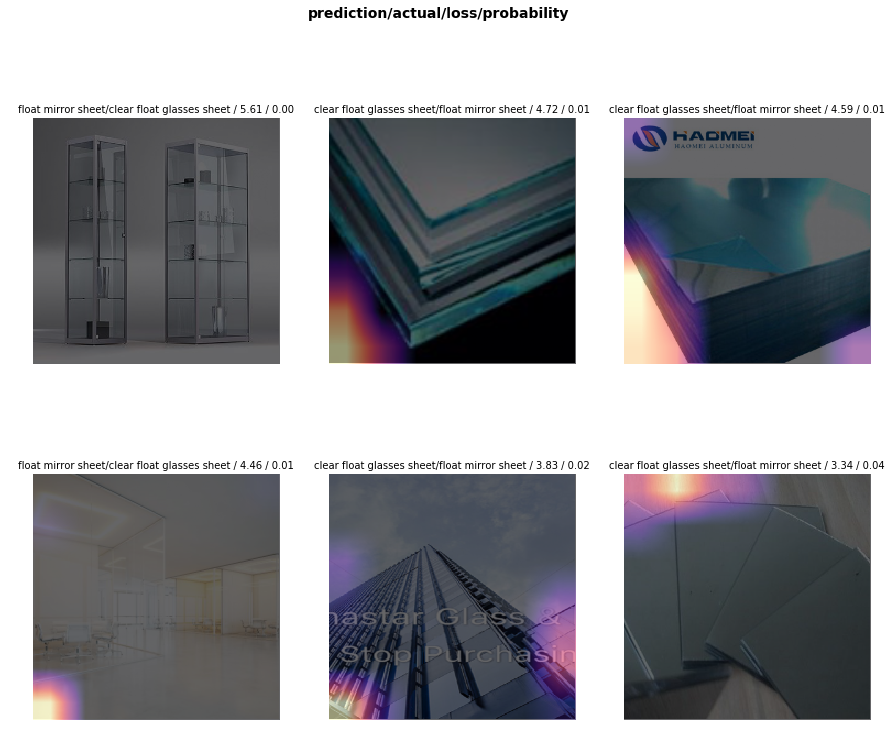

In [0]:
interp.plot_top_losses(6, figsize=(15,12))

In [0]:
path = Path("/content/gdrive/My Drive/AI")

In [0]:
img = open_image(path/'tinted-float-glass-500x500.jpg')

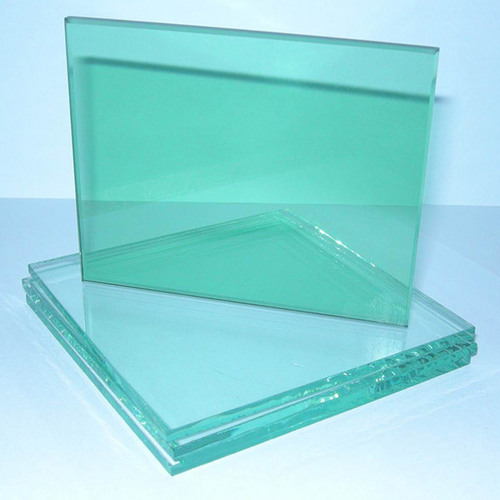

In [0]:
img

In [0]:
path = Path(root_dir)
path

PosixPath('/content/gdrive/My Drive/AI/DP_CV')

In [0]:
Learn = load_learner(path, file='weights_stage11.pkl')

In [0]:
pred_class, pred_idx, outputs = Learn.predict(img)
print(pred_class, outputs)

clear float glasses sheet tensor([0.9985, 0.0015])


In [0]:
path = Path("/content/gdrive/My Drive/AI")
img = open_image(path/'2mm-6mm-Double-Coated-Float-Glass-Aluminum.jpg')

In [0]:
pred_class, pred_idx, outputs = Learn.predict(img)
print(pred_class, outputs)

float mirror sheet tensor([0.4249, 0.5751])


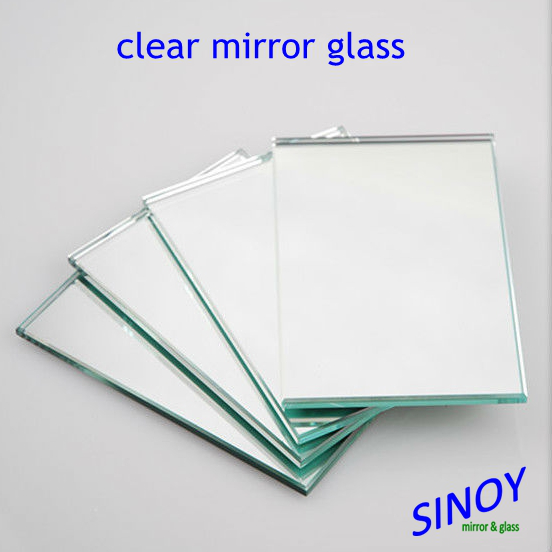

In [0]:
img

**The model recognizes very nice "clear float glasses sheet" from "float mirror sheet" but in opposite "float mirror sheet" has a small gap of possibility. **

**But when I choose a picture with noise background the model predicts the wrong result. "clear float glasses sheet" class was predicted like "float mirror sheet". "float mirror sheet" was predicted well with a big gap of possibility. As a result our model is not stable and sensible to the background. If there is a request to improve the model we have to answer questions: for what will be using that model? what pictures will be upload to predict the class? **


In [0]:
path = Path("/content/gdrive/My Drive/AI")
img = open_image(path/'pl16802196-remark.jpg')

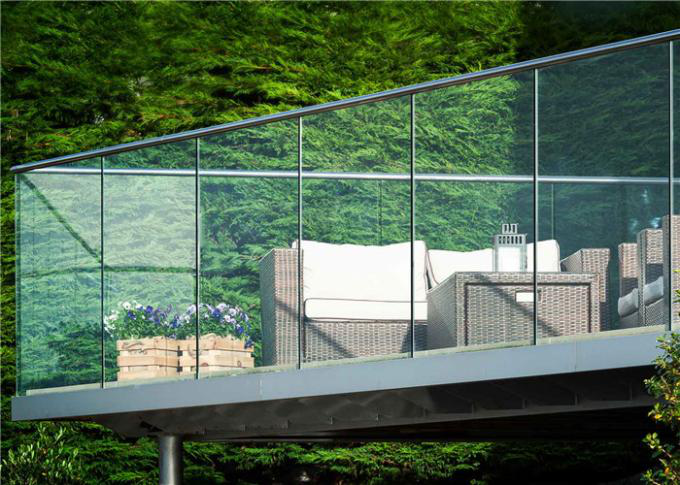

In [0]:
img

In [0]:
pred_class, pred_idx, outputs = Learn.predict(img)
print(pred_class, outputs)

float mirror sheet tensor([0.3460, 0.6540])


In [0]:
img = open_image(path/'B1165098347.jpg')

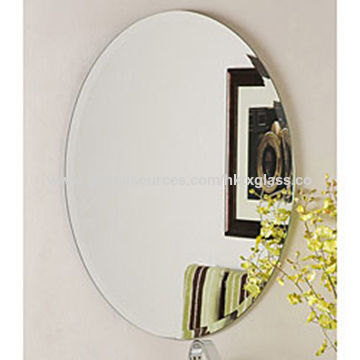

In [0]:
img

###Now i try to create a ResNET 34 without pretrained weights

In [0]:
pred_class, pred_idx, outputs = Learn.predict(img)
print(pred_class, outputs)

float mirror sheet tensor([0.0013, 0.9987])


In [0]:
tfms = get_transforms(max_rotate=10.0, max_zoom=1.1, 
                       max_lighting=0.2, max_warp=0.2, 
                       p_affine=0.75, p_lighting=0.75)


In [0]:
data = ImageDataBunch.from_folder(path=root_dir, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet34, pretrained=0, metrics=error_rate)

In [0]:
learn.fit_one_cycle(5, max_lr=0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.860812,0.746680,0.573529,00:20
1,0.854346,2.061944,0.345588,00:22
2,0.790167,0.541874,0.279412,00:22
3,0.740245,0.540781,0.250000,00:22
4,0.706821,0.531069,0.250000,00:21


**I can see a decrease in error_rate after several cycles of resnet34 architecture. I see roughly a 22% decrease in error rate with a roughly 25% error rate giving us 75% accuracy in classifying.  Conventionally training loss should be less than the validation loss, showing that our model is training correctly. But. any way, this is good enough for so complicated problem.**

And i see so manies losses during of the second epoch.

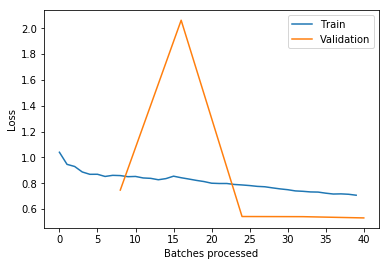

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-111')

In [0]:
learn.export(root_dir+'/'+'weights_stage111.pkl')

**So until now, i have only been training the last classification layers, but what if i want to optimize earlier layers too. The lr_find function runs the model for a subset of data at multiple learning rate to determine which learning rate would be best.**

In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


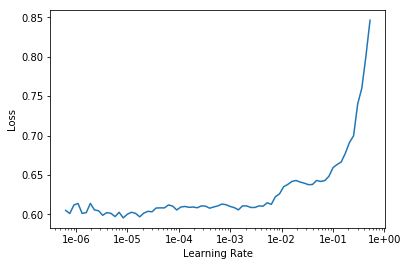

In [0]:
learn.recorder.plot()

It looks like we should keep our learning rate lower than 1e-02. We can use slice function to logarithmically distribute learning rate between 1e-06 to 1e-02 for different layers in the network. Keeping the lowest learning rate for the initial layers and increasing it for later layers. 

Let’s unfreeze all the layers so that we can train the entire model using unfreeze() function.

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-06,1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.704235,16.325846,0.345588,00:21
1,0.699428,3.201016,0.470588,00:22
2,0.701457,0.594349,0.286765,00:21
3,0.696699,0.632401,0.272059,00:21
4,0.714736,0.605770,0.264706,00:20


**The result is not improved. Conventionally training loss should be less than the validation loss, showing that our model is training correctly. **

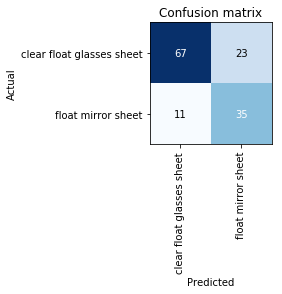

In [0]:
learn.load('stage-111')
interpretation = ClassificationInterpretation.from_learner(learn)
# Plot the confusion matrix to see where does the most errors are made
interpretation.plot_confusion_matrix()

**What i can do here to optimize our model is to remove images that is irrelevant in our dataset. I can manually delete these files in the directory.**

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idxs, Path(root_dir))

###Pretrained models for Pytorch

In [0]:
!pip install pretrainedmodels

In [0]:
import pretrainedmodels

In [0]:
print(pretrainedmodels.model_names)

['fbresnet152', 'bninception', 'resnext101_32x4d', 'resnext101_64x4d', 'inceptionv4', 'inceptionresnetv2', 'alexnet', 'densenet121', 'densenet169', 'densenet201', 'densenet161', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'inceptionv3', 'squeezenet1_0', 'squeezenet1_1', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19_bn', 'vgg19', 'nasnetamobile', 'nasnetalarge', 'dpn68', 'dpn68b', 'dpn92', 'dpn98', 'dpn131', 'dpn107', 'xception', 'senet154', 'se_resnet50', 'se_resnet101', 'se_resnet152', 'se_resnext50_32x4d', 'se_resnext101_32x4d', 'cafferesnet101', 'pnasnet5large', 'polynet']


In [0]:
print(pretrainedmodels.pretrained_settings['resnet34'])

{'imagenet': {'url': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth', 'input_space': 'RGB', 'input_size': [3, 224, 224], 'input_range': [0, 1], 'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225], 'num_classes': 1000}}


In [0]:
model_name = 'resnet34' 
model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
model.eval()

In [0]:
import torch
import pretrainedmodels.utils as utils

load_img = utils.LoadImage()

In [0]:
tf_img = utils.TransformImage(model) 

path = Path("/content/gdrive/My Drive/AI")


In [0]:
input_img = load_img(path/'2mm-6mm-Double-Coated-Float-Glass-Aluminum.jpg')

In [0]:
input_tensor = tf_img(input_img)         # 3x400x225 -> 3x299x299 size may differ
input_tensor = input_tensor.unsqueeze(0) # 3x299x299 -> 1x3x299x299
input = torch.autograd.Variable(input_tensor,
    requires_grad=False)

output_logits = model(input) # 1x1000

In [0]:
#To extract features (beware this API is not available for all networks):
output_features = model.features(input) # 1x14x14x2048 size may differ
output_logits = model.logits(output_features) # 1x1000

In [0]:
print('Display parameters')
state_dict = model.state_dict() # http://pytorch.org/docs/master/_modules/torch/nn/modules/module.html#Module.state_dict
for key, value in state_dict.items():
       print(key, value.size())

Display parameters
conv1.weight torch.Size([64, 3, 7, 7])
bn1.weight torch.Size([64])
bn1.bias torch.Size([64])
bn1.running_mean torch.Size([64])
bn1.running_var torch.Size([64])
bn1.num_batches_tracked torch.Size([])
layer1.0.conv1.weight torch.Size([64, 64, 3, 3])
layer1.0.bn1.weight torch.Size([64])
layer1.0.bn1.bias torch.Size([64])
layer1.0.bn1.running_mean torch.Size([64])
layer1.0.bn1.running_var torch.Size([64])
layer1.0.bn1.num_batches_tracked torch.Size([])
layer1.0.conv2.weight torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight torch.Size([64])
layer1.0.bn2.bias torch.Size([64])
layer1.0.bn2.running_mean torch.Size([64])
layer1.0.bn2.running_var torch.Size([64])
layer1.0.bn2.num_batches_tracked torch.Size([])
layer1.1.conv1.weight torch.Size([64, 64, 3, 3])
layer1.1.bn1.weight torch.Size([64])
layer1.1.bn1.bias torch.Size([64])
layer1.1.bn1.running_mean torch.Size([64])
layer1.1.bn1.running_var torch.Size([64])
layer1.1.bn1.num_batches_tracked torch.Size([])
layer1.1.conv2.weigh

In [0]:
def load_imagenet_classes():
    with open(path/'imagenet_synsets.txt', 'r') as f:
        synsets = f.readlines()

    synsets = [x.strip() for x in synsets]
    splits = [line.split(' ') for line in synsets]
    key_to_classname = {spl[0]:' '.join(spl[1:]) for spl in splits}

    with open(path/'imagenet_classes.txt', 'r') as f:
        class_id_to_key = f.readlines()

    class_id_to_key = [x.strip() for x in class_id_to_key]

    cid_to_cname = []
    for i in range(len(class_id_to_key)):
        key = class_id_to_key[i]
        cname = key_to_classname[key]
        cid_to_cname.append(cname)

    return cid_to_cname

In [0]:
# Load Imagenet Synsets
imagenet_classes = load_imagenet_classes()
print('Imagenet has {} classes'.format(imagenet_classes))


In [0]:
max, argmax = output_logits.data.squeeze().max(0)


In [0]:
argmax


tensor(549)

In [0]:
print('Image {} is of class "{}"'.format("Glass image", imagenet_classes[549]))

Image Glass image is of class "envelope"


In [0]:
img = open_image(path/'2mm-6mm-Double-Coated-Float-Glass-Aluminum.jpg')

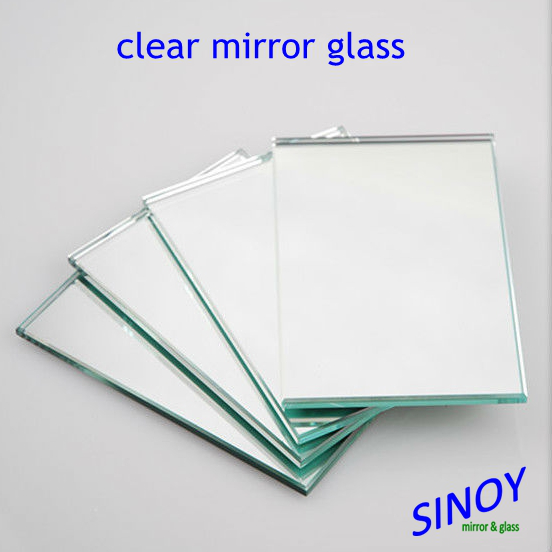

In [0]:
img

###Pretrainedmodels recognized the glass-image like an envelope. It seems the shape of both are almost similar :)

##Clear imitation of [Not Hotdog](https://medium.com/@timanglade/how-hbos-silicon-valley-built-not-hotdog-with-mobile-tensorflow-keras-react-native-ef03260747f3) at the [Open Food Data Hackdays](https://food.opendata.ch) / [Applied Machine Learning Days](https://www.appliedmldays.org/

In [0]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from torch.autograd import Variable
import matplotlib.pyplot as plt

In [0]:
from torchvision.datasets import ImageFolder

In [0]:
import torchvision

In [0]:
import os.path as os
import glob

In [0]:
#Here i specify the path of the dataset location which is in 
root_dir = "/content/gdrive/My Drive/AI/DP_CV"

In [0]:
# dataset pre-processing
train_transform = transforms.Compose([
    transforms.CenterCrop(200), # crop our images to a 200 square
    transforms.Resize(224), # resize down to 224x224 (power of 2)
    transforms.ToTensor(), # convert to a Tensor
])


In [0]:

# details on how to use ImageFolder in https://github.com/pytorch/vision#imagefolder
tset = ImageFolder(root_dir, transform=train_transform)


In [0]:
train_dataloader.dataset

Dataset ImageFolder
    Number of datapoints: 681
    Root Location: /content/gdrive/My Drive/AI/DP_CV
    Transforms (if any): Compose(
                             CenterCrop(size=(200, 200))
                             Resize(size=224, interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                         )
    Target Transforms (if any): None

In [0]:
train_dataloader = DataLoader(tset, batch_size=4, shuffle=True)
num_classes = len(set(tset.classes))

In [0]:
num_classes

2

In [0]:
tset.classes

['clear float glasses sheet', 'float mirror sheet']

In [0]:
# use pretrained resnet34 network with image input
model = torchvision.models.resnet34(pretrained=True)
num_ftrs = model.fc.in_features # e.g. 2048
model.fc = torch.nn.Linear(num_ftrs, num_classes)
print("Features: ", num_ftrs)

Features:  512


In [0]:
# run in cuda
if torch.cuda.is_available():
    model = model.cuda()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# loss function
loss_fn = nn.CrossEntropyLoss()

# begin to train models
model.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
for inputs, labels in train_dataloader:
    if torch.cuda.is_available():
        # use cuda
        inputs = Variable(inputs.cuda())
        labels = Variable(labels.cuda())
    else:
        # use cpu
        inputs = Variable(inputs)
        labels = Variable(labels)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()


In [0]:
def test_image(image_file):
    plt.imshow(plt.imread(path/image_file))

    img2 = Image.open(path/image_file)
    img2 = train_transform(img2)
    img2 = img2.unsqueeze(0)  # pytorch only accepts batch images

    img2 = Variable(img2)
    if torch.cuda.is_available(): img2 = img2.cuda()

    target = model(img2)

    # get the predict classes
    _, pred = torch.max(target.data, 1)

    print(nn.functional.softmax(target))
    print("It may be: ", tset.classes[pred[0]], " !!!")
    print(pred)

In [0]:
tset.classes

['clear float glasses sheet', 'float mirror sheet']

In [0]:
from PIL import Image

In [0]:
path = Path("/content/gdrive/My Drive/AI")

tensor([[0.5454, 0.4546]], device='cuda:0', grad_fn=<SoftmaxBackward>)
It may be:  clear float glasses sheet  !!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


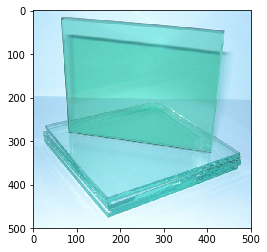

In [0]:
test_image('tinted-float-glass-500x500.jpg')

tensor([[0.5537, 0.4463]], device='cuda:0', grad_fn=<SoftmaxBackward>)
It may be:  clear float glasses sheet  !!!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


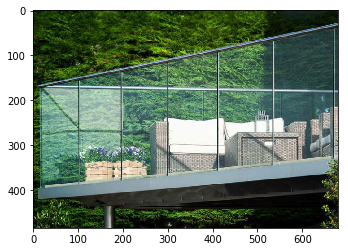

In [0]:
test_image('pl16802196-remark.jpg')

tensor([[0.5705, 0.4295]], device='cuda:0', grad_fn=<SoftmaxBackward>)
It may be:  clear float glasses sheet  !!!
tensor([0], device='cuda:0')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


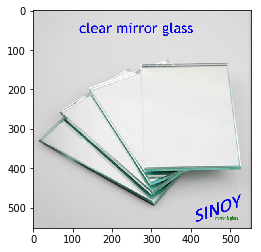

In [0]:
test_image('2mm-6mm-Double-Coated-Float-Glass-Aluminum.jpg')

tensor([[0.5347, 0.4653]], device='cuda:0', grad_fn=<SoftmaxBackward>)
It may be:  clear float glasses sheet  !!!
tensor([0], device='cuda:0')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


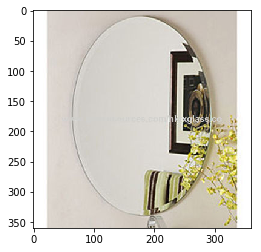

In [0]:
test_image('B1165098347.jpg')

###The last model did not recognize the mirror. I think there is a lot of methods which I would try to do something and learn but I stopped on this stage with the intention to work further with PyTorch and other nice libraries.

In [0]:
from torch.utils import data

In [0]:
train_len = int(0.8*tset.len)
test_len = tset.len - train_len
train_set, test_set = data.random_split(tset, lengths=[train_len, test_len])
# check lens of subset
len(train_set), len(test_set)

In [0]:
class CustomDataset(Dataset):
  self.len = 0
  def __init__(self, root):

    self.filename = root_dir
    self.root = root
    self.to_tensor = transforms.ToTensor()
    filenames = glob.glob(os.join(root_dir, '*.*'))
    for fn in filenames:
        self.filenames.append(fn)
        self.len = len(self.filenames)
        print(fn)

  def __getitem__(self, index):
    image = Image.open(self.filenames[index])
    return self.transform(image)

  def __len__(self):

    return self.len
custom_img = CustomDataset(root_dir)
# total images in set
print(custom_img.len)
